# example k-means reduced zonal dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# custom scripts 
import scripts.read as read
import scripts.prep as prep
import scripts.kmeans as kmeans

In [2]:
# load BE data
df_BE=read.zonal_data('zonal_data/INPUT_DATA_ZONAL_BE.xlsx')
# normalisation factor of 4 for BE_ND to increase its importance in the subsequent clustering
df_BE['ND']=prep.max_normalise(df_BE['ND'], 4) 
# add 'BE' in front of every column in the dataframe to to distinguish between countries in merged dataframe
df_BE=prep.add_country_name(df_BE, 'BE')
df_BE.describe()

INTERCONN is identically zero.


BE_ND  BE_WIND_ONSHORE  BE_WIND_OFFSHORE     BE_SOLAR  \
count  8760.000000      8760.000000       8760.000000  8760.000000   
mean      2.975173         0.171542          0.408345     0.102262   
std       0.378897         0.160393          0.330119     0.151439   
min       2.055689         0.000000          0.000000     0.000000   
25%       2.721740         0.043827          0.099719     0.000000   
50%       3.016437         0.116049          0.334270     0.002615   
75%       3.234711         0.257407          0.745787     0.173244   
max       4.000000         0.998148          0.967697     0.660135   

          BE_HYDRO   BE_BIOMASS   BE_NUCLEAR  BE_OTHER_GEN  
count  8760.000000  8760.000000  8760.000000   8760.000000  
mean      0.081661     0.462982     0.478261      0.498569  
std       0.067165     0.117066     0.125715      0.045038  
min       0.000000     0.060649     0.236078      0.255435  
25%       0.017391     0.444288     0.412420      0.470109  
50%       0.069565     0.469676     0.507256      0.502717  
75%       0.147826     0.554302     0.579312      0.532609  
max       0.208696     0.630465     0.822140      0.614130

In [3]:
# load AT data
df_AT=read.zonal_data('zonal_data/INPUT_DATA_ZONAL_AT.xlsx')
# normalisation factor of 4 for BE_ND to increase its importance in the subsequent clustering
df_AT['ND']=prep.max_normalise(df_AT['ND'], 4)
# AT_INTERCONN has normalisation factor of 1 (default)
df_AT['INTERCONN']=prep.max_normalise(df_AT['INTERCONN'])
# add 'AT' in front of every column in the dataframe
df_AT=prep.add_country_name(df_AT, 'AT')
df_AT.describe()

WIND_OFFSHORE is identically zero.
NUCLEAR is identically zero.
OTHER_GEN is identically zero.


AT_ND  AT_WIND_ONSHORE     AT_SOLAR     AT_HYDRO   AT_BIOMASS  \
count  8760.000000      8760.000000  8760.000000  8760.000000  8760.000000   
mean      2.985608         0.253861     0.159438     0.398663     0.644243   
std       0.474555         0.143749     0.224376     0.133731     0.043179   
min       1.868206         0.003713     0.000000     0.165434     0.521552   
25%       2.654007         0.142456     0.000000     0.299161     0.620690   
50%       3.034726         0.235946     0.017462     0.364130     0.655172   
75%       3.318725         0.345979     0.281090     0.491588     0.672414   
max       4.000000         0.841730     0.867547     0.791855     0.741379   

       AT_INTERCONN  
count   8760.000000  
mean       0.237638  
std        0.247113  
min       -0.697967  
25%        0.074954  
50%        0.242514  
75%        0.409242  
max        1.000000

In [4]:
# merge BE and AT data for clustering
dfs=[df_BE, df_AT]
df=prep.merge(dfs)
df.describe()

BE_ND  BE_WIND_ONSHORE  BE_WIND_OFFSHORE     BE_SOLAR  \
count  8760.000000      8760.000000       8760.000000  8760.000000   
mean      2.975173         0.171542          0.408345     0.102262   
std       0.378897         0.160393          0.330119     0.151439   
min       2.055689         0.000000          0.000000     0.000000   
25%       2.721740         0.043827          0.099719     0.000000   
50%       3.016437         0.116049          0.334270     0.002615   
75%       3.234711         0.257407          0.745787     0.173244   
max       4.000000         0.998148          0.967697     0.660135   

          BE_HYDRO   BE_BIOMASS   BE_NUCLEAR  BE_OTHER_GEN        AT_ND  \
count  8760.000000  8760.000000  8760.000000   8760.000000  8760.000000   
mean      0.081661     0.462982     0.478261      0.498569     2.985608   
std       0.067165     0.117066     0.125715      0.045038     0.474555   
min       0.000000     0.060649     0.236078      0.255435     1.868206   
25%       0.017391     0.444288     0.412420      0.470109     2.654007   
50%       0.069565     0.469676     0.507256      0.502717     3.034726   
75%       0.147826     0.554302     0.579312      0.532609     3.318725   
max       0.208696     0.630465     0.822140      0.614130     4.000000   

       AT_WIND_ONSHORE     AT_SOLAR     AT_HYDRO   AT_BIOMASS  AT_INTERCONN  
count      8760.000000  8760.000000  8760.000000  8760.000000   8760.000000  
mean          0.253861     0.159438     0.398663     0.644243      0.237638  
std           0.143749     0.224376     0.133731     0.043179      0.247113  
min           0.003713     0.000000     0.165434     0.521552     -0.697967  
25%           0.142456     0.000000     0.299161     0.620690      0.074954  
50%           0.235946     0.017462     0.364130     0.655172      0.242514  
75%           0.345979     0.281090     0.491588     0.672414      0.409242  
max           0.841730     0.867547     0.791855     0.741379      1.000000

In [5]:
# train kmeans model 
labels, centres=kmeans.clustering(df) # using default 20 clusters

In [6]:
# output daily day type table
df_labels=kmeans.df_daily_label(labels, 2018)
df_labels

daytype
2018-01-01       16
2018-01-02       17
2018-01-03       19
2018-01-04       19
2018-01-05       19
...             ...
2018-12-27       17
2018-12-28       17
2018-12-29       17
2018-12-30       17
2018-12-31       17

[365 rows x 1 columns]

In [7]:
# reconstruct the data table with cluster centres
df_reduced=kmeans.df_centres(df, labels, centres)
df_reduced

BE_ND  BE_WIND_ONSHORE  BE_WIND_OFFSHORE      BE_SOLAR  BE_HYDRO  \
Time                                                                        
1     2.838218         0.182099          0.794242  0.000000e+00  0.160870   
2     2.616419         0.185494          0.798455  0.000000e+00  0.160870   
3     2.469548         0.183951          0.761236  0.000000e+00  0.160870   
4     2.350503         0.201852          0.556180  0.000000e+00  0.160870   
5     2.281765         0.187963          0.509129  0.000000e+00  0.160870   
...        ...              ...               ...           ...       ...   
8756  3.163095         0.325679          0.780337  0.000000e+00  0.129565   
8757  2.987369         0.320926          0.799157 -3.469447e-18  0.126087   
8758  2.890612         0.300185          0.788904  0.000000e+00  0.122609   
8759  2.998012         0.296543          0.744803  0.000000e+00  0.123478   
8760  2.983878         0.257654          0.736517  0.000000e+00  0.125217   

      BE_BIOMASS  BE_NUCLEAR  BE_OTHER_GEN     AT_ND  AT_WIND_ONSHORE  \
Time                                                                    
1       0.227786    0.508016      0.551630  2.546124         0.109984   
2       0.228491    0.506244      0.555707  2.410350         0.104818   
3       0.224260    0.509450      0.551630  2.315056         0.098545   
4       0.226375    0.510715      0.552989  2.206895         0.095795   
5       0.224965    0.510547      0.554348  2.190770         0.103490   
...          ...         ...           ...       ...              ...   
8756    0.392525    0.707239      0.538859  3.217167         0.332767   
8757    0.381946    0.708826      0.539674  3.037690         0.332606   
8758    0.368406    0.709467      0.540489  2.865606         0.331732   
8759    0.359661    0.709838      0.541033  2.918659         0.329311   
8760    0.348096    0.705451      0.537500  2.724385         0.324402   

      AT_SOLAR  AT_HYDRO  AT_BIOMASS  AT_INTERCONN  
Time                                                
1          0.0  0.228238    0.659483      0.568392  
2          0.0  0.227246    0.659483      0.629205  
3          0.0  0.224202    0.659483      0.635860  
4          0.0  0.225893    0.658405      0.587246  
5          0.0  0.226073    0.657328      0.544362  
...        ...       ...         ...           ...  
8756       0.0  0.224811    0.664871      0.372569  
8757       0.0  0.213553    0.666164      0.371608  
8758       0.0  0.204794    0.667241      0.352717  
8759       0.0  0.198548    0.667672      0.390684  
8760       0.0  0.196496    0.667241      0.453457  

[8760 rows x 14 columns]

In [ ]:
# output files
# df_labels.to_csv('daytype.csv')
# df_reduced.to_csv('reduced_data.csv')

In [8]:
# inspect output graphically
def plot_compare(col_name):
    plt.figure(figsize=(20,8)) 
    plt.plot(df[col_name], label='data')
    plt.plot(df_reduced[col_name], label='kmeans centre')
    plt.title(col_name.replace('_', ' '), size=16)
    plt.xticks(size=16) # x-axis font size
    plt.yticks(size=16) # y-axis font size
    plt.xlabel('time step', size=16) # x-axis label
    plt.ylabel('factor', size=16) # y-axis label
    plt.legend(prop={'size':16})
    plt.show()

In [9]:
plot_compare('BE_ND')

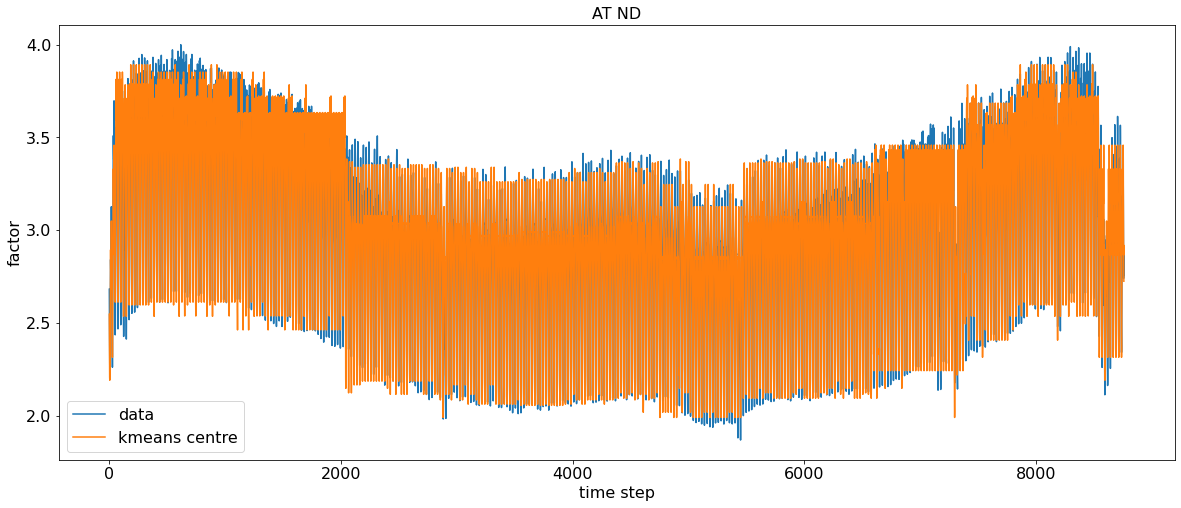

In [10]:
plot_compare('AT_ND')

In [11]:
plot_compare('BE_WIND_OFFSHORE')

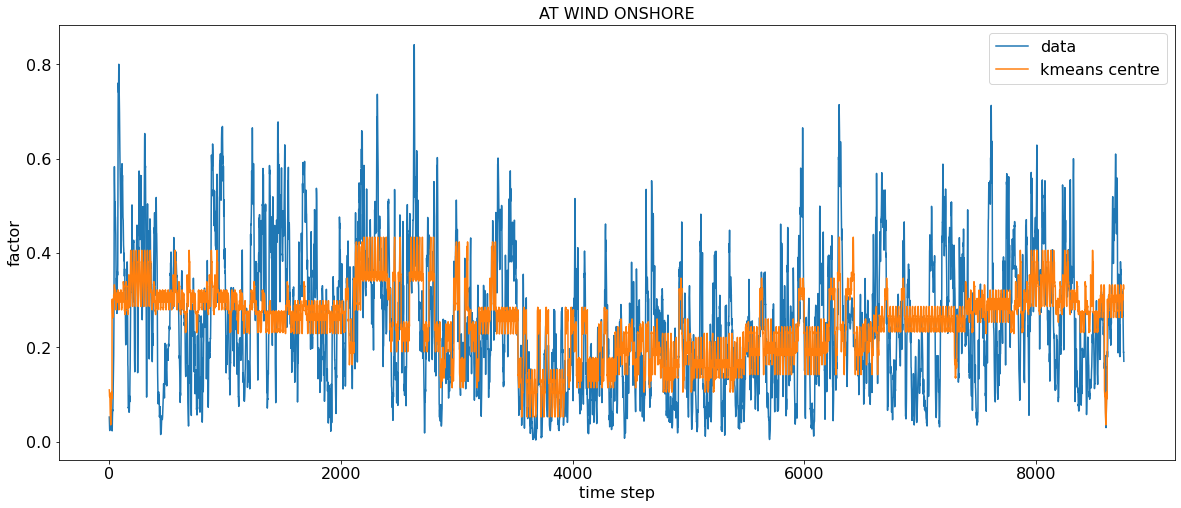

In [12]:
plot_compare('AT_WIND_ONSHORE')